In [71]:

# Importing libraries and loading data into the dataframe.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='muted') # Setting the style of the plots.

my_year_month_fmt = mdates.DateFormatter('%m/%y') # Creating a custom data formatter.

data = pd.read_csv('AAPL.csv')
data.head()

,Date,Close,High
0,4-Jan-16,105.74,105.77
1,5-Jan-16,102.23,105.85
2,6-Jan-16,100.97,102.37
3,7-Jan-16,95.62,100.59
4,8-Jan-16,97.01,99.11


In [72]:

# Shape of the data
data.shape

(671, 3)

In [73]:
# Checking if there are any null values in the data
data.isnull().sum()

Date      0
Close     0
High      0
dtype: int64

In [74]:
# Getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 3 columns):
Date      671 non-null object
Close     671 non-null float64
High      671 non-null float64
dtypes: float64(2), object(1)
memory usage: 15.8+ KB


In [75]:
#Exploring the data
data.describe()

,Close,High
count,671.000000,671.000000
mean,141.501058,142.727347
std,33.766764,33.933918
min,90.020000,91.670000
25%,109.160000,110.065000
50%,143.900000,144.900000
75%,170.575000,172.680000
max,225.000000,228.260000


In [76]:
# Indexing the date to plot a good time-series on the graph
import datetime
data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']
del data['Date']

In [77]:
# Calculating the short-window simple moving average. Window = 30 Days
short_rolling = data.rolling(window=30).mean()
short_rolling.head(20)

,Close,High
Date,,
2016-01-04,NaN,NaN
2016-01-05,NaN,NaN
2016-01-06,NaN,NaN
2016-01-07,NaN,NaN
2016-01-08,NaN,NaN
2016-01-11,NaN,NaN
2016-01-12,NaN,NaN
2016-01-13,NaN,NaN
2016-01-14,NaN,NaN


In [78]:
# Calculating the long-window simple moving average. Window: 60 Days
long_rolling = data.rolling(window=60).mean()
long_rolling.tail()

,Close,High
Date,,
2018-08-24,195.923000,197.264333
2018-08-27,196.384167,197.735000
2018-08-28,196.843000,198.187000
2018-08-29,197.350500,198.683833
2018-08-30,197.869667,199.252667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C6B380CBA8>,
      dtype=object)

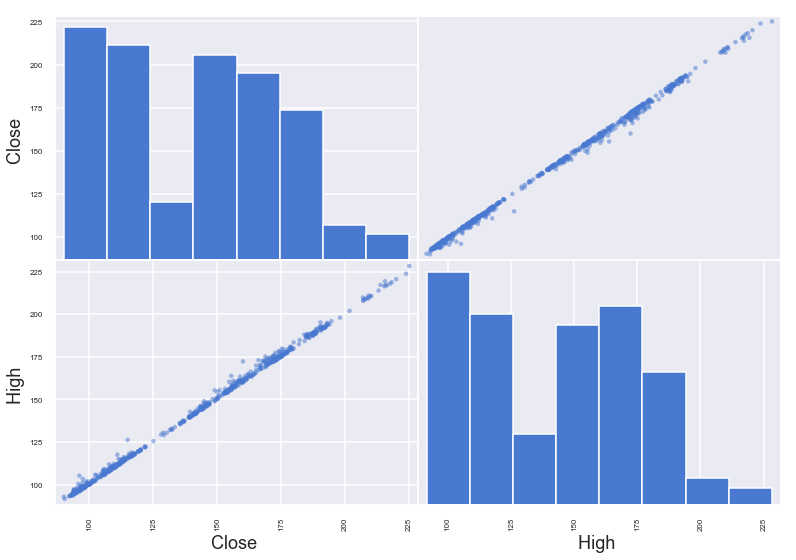

In [79]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (13, 9), hist_kwds = {'bins' : 8})

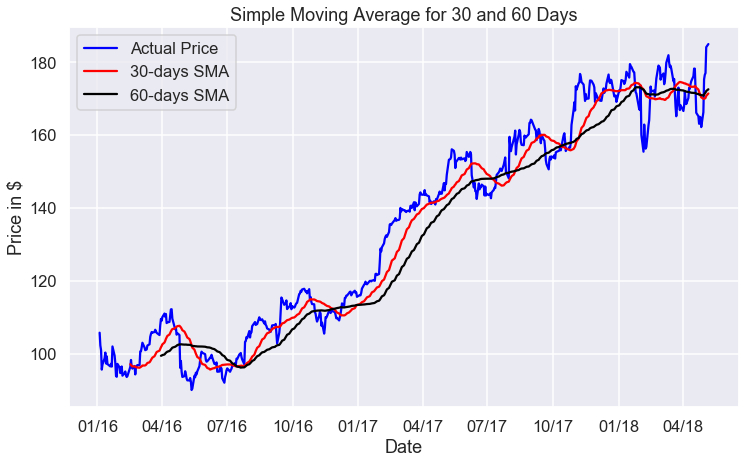

In [97]:
# Plotting the curves for Actual Price, Short window and Long Window.

start_date = '2013-05-08'
end_date = '2018-05-07'

fig, ax = plt.subplots(figsize=(12,7)) # Setting the size of the plot.

#ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'SP500'], label='SP500', color = 'green')
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close '], label='Actual Price', color = 'blue')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close '], label = '30-days SMA', color = 'red')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close '], label = '60-days SMA', color = 'black')


ax.legend(loc='best')
ax.set_title('Simple Moving Average for 30 and 60 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

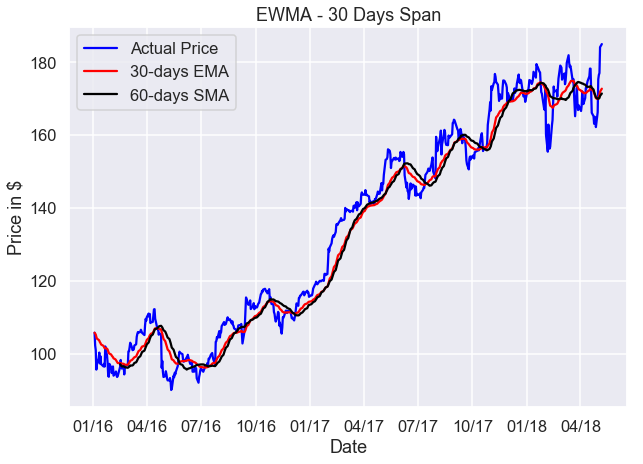

In [95]:
# Calculating a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.

ema_short = data.ewm(span=30, adjust=False).mean()

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close '], label='Actual Price', color = 'blue')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close '], label = '30-days EMA', color = 'red')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close '], label = '60-days SMA', color = 'black')

ax.legend(loc='best')
ax.set_title('EWMA - 30 Days Span')
ax.set_xlabel('Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# Trading Strategy

When the Actual Price timeseries (Blue) crosses the EMA timeseries (Red) from below, we will go long (buy).

When the Actual Price timeseries (Blue) crosses the EMA timeseries (Red) from above, we will go short (sell).

In [82]:

# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,Close,High
Date,,
2018-08-24,10.904965,10.104444
2018-08-27,11.941419,11.173835
2018-08-28,12.780037,12.136813
2018-08-29,15.575841,14.356696
2018-08-30,15.740303,17.649490


In [83]:
# Taking the sign of the difference to determine whether the price or the EMA is greater
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

,Close,High
Date,,
2018-08-24,1.0,1.0
2018-08-27,1.0,1.0
2018-08-28,1.0,1.0
2018-08-29,1.0,1.0
2018-08-30,1.0,1.0


In [84]:

# Taking the sign of the difference to determine whether the price or the EMA is greater
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

,Close,High
Date,,
2018-08-24,1.0,1.0
2018-08-27,1.0,1.0
2018-08-28,1.0,1.0
2018-08-29,1.0,1.0
2018-08-30,1.0,1.0


In [85]:

# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)
trading_positions_final

,Close,High
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.0,0.0
2016-01-06,-1.0,1.0
2016-01-07,-1.0,-1.0
2016-01-08,-1.0,-1.0
2016-01-11,-1.0,-1.0
2016-01-12,-1.0,-1.0
2016-01-13,-1.0,-1.0
2016-01-14,-1.0,-1.0


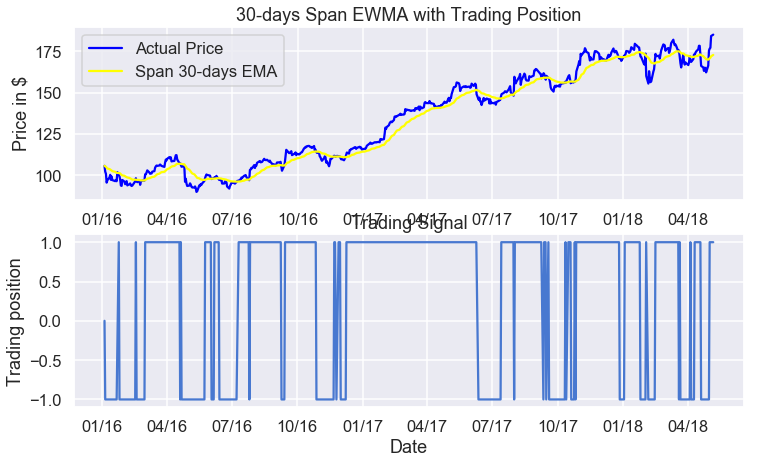

In [100]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,7))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close '], label='Actual Price', color = 'blue')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close '], label = 'Span 30-days EMA', color = 'yellow')

ax1.set_title('30-days Span EWMA with Trading Position')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Close '], 
        label='Trading position')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Date')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

So the trading position at 1 means Buy and -1 means sell.

In [87]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns.head()

,Close,High
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.033758,0.000756
2016-01-06,-0.012402,-0.033429
2016-01-07,-0.054441,-0.017541
2016-01-08,0.014432,-0.014823


In [88]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Close,High
Date,,
2018-08-24,0.002778,-0.000691
2018-08-27,0.008562,0.008447
2018-08-28,0.007853,0.008195
2018-08-29,0.017447,0.014450
2018-08-30,0.005571,0.019956


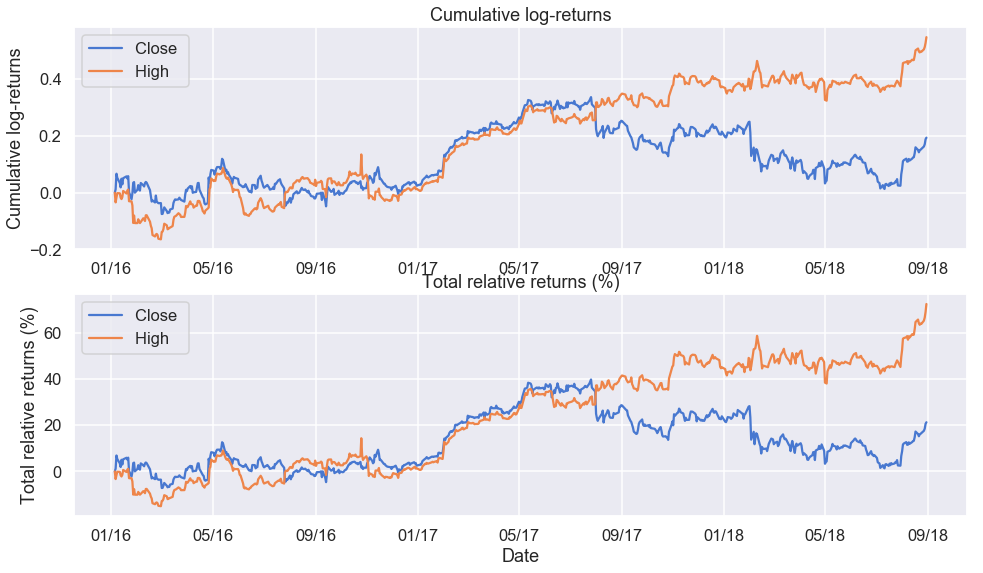

In [89]:

# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_title('Cumulative log-returns')
ax2.set_xlabel('Date')
ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))
ax2.set_title('Total relative returns (%)')
ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

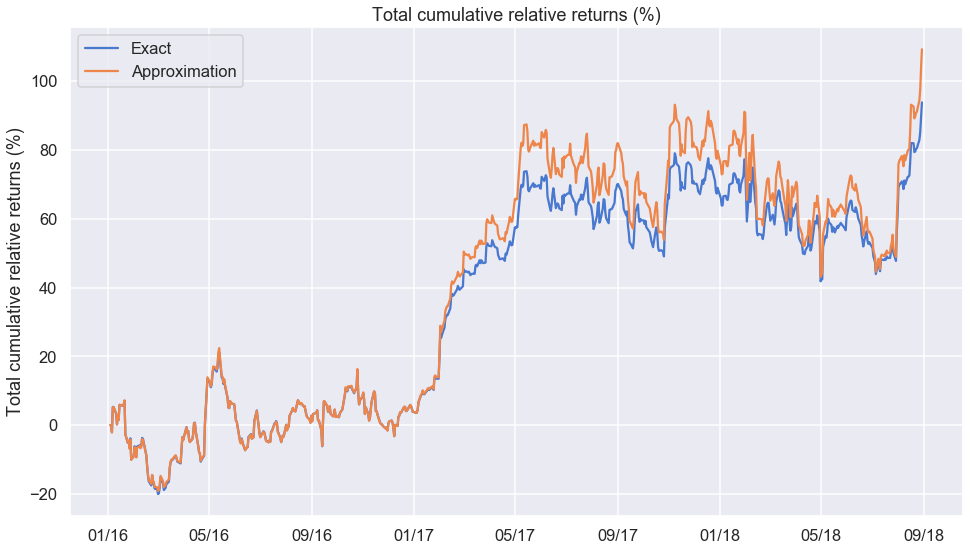

In [90]:

# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_title('Total cumulative relative returns (%)')
ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)